In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import custom_datasets as datasets
import TS
from PIL import Image
import itertools
import subprocess
import os



In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

Using cuda device


## Time series

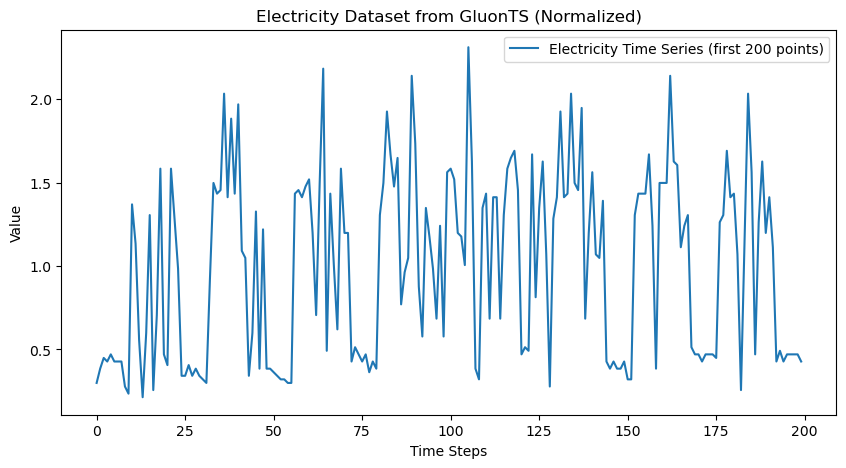

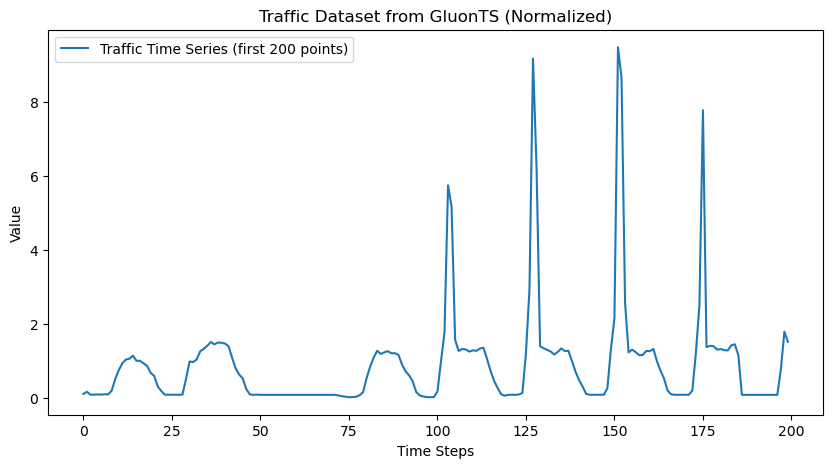

In [34]:
# Load Dataset for Electricity
ds = datasets.get_dataset("electricity", n=900)  
data_tensor = ds[:][0]
data_array = data_tensor.squeeze(-1).numpy()
# Visualize dataset
plt.figure(figsize=(10, 5))
plt.plot(data_array[:200], label="Electricity Time Series (first 200 points)")
plt.title("Electricity Dataset from GluonTS (Normalized)")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()

# Load Dataset for traffic
ds = datasets.get_dataset("traffic", n=900)
data_tensor = ds[:][0]
data_array = data_tensor.squeeze(-1).numpy()
# Visualize dataset
plt.figure(figsize=(10, 5))
plt.plot(data_array[:200], label="Traffic Time Series (first 200 points)")
plt.title("Traffic Dataset from GluonTS (Normalized)")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()


### Hyperparameter tuning through grid search 

In [ ]:
# Test values
lr_values = [0.0001,0.001, 0.01]
num_steps_values = [30, 50, 100]
context_length_values = [30, 50, 100]
epoch_number = [5, 10, 20]

# Loop over each learning rate value
for lr, num_steps, context_length, epochs in itertools.product(lr_values, num_steps_values, context_length_values, epoch_number):
    outdir = f"./results/{lr}_lr_{num_steps}_steps_{context_length}_context_{epochs}_epochs"
    os.makedirs(outdir, exist_ok=True)
    
    # Construct the command string
    command = (
        f"python TS.py --lr {lr} --num_steps {num_steps} --context_length {context_length} "
        f"--forecast_steps 30 --num_epochs {epochs} --hidden_dim 64 --dataset electricity "
        f"--n_data 1000"
    )
    
    print("Executing:", command)
    subprocess.run(command, shell=True)


Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 30 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=30, context_length=30, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.1513
Forecast MAE: 0.8336
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 30 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=30, context_length=30, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9076
Forecast MAE: 0.7284
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 30 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=30, context_length=30, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6693
Forecast MAE: 0.6331
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=30, context_length=50, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6051
Forecast MAE: 0.5484
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=30, context_length=50, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.4115
Forecast MAE: 0.4652
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=30, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.3542
Forecast MAE: 0.4535
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 100 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=30, context_length=100, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.5029
Forecast MAE: 0.6271
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 100 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=30, context_length=100, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9994
Forecast MAE: 0.8598
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 100 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=30, context_length=100, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7129
Forecast MAE: 0.7166
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 50 --context_length 30 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=50, context_length=30, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.0450
Forecast MAE: 0.8000
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 50 --context_length 30 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=50, context_length=30, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9771
Forecast MAE: 0.8184
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 50 --context_length 30 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=50, context_length=30, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.4487
Forecast MAE: 0.6073
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 50 --context_length 50 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=50, context_length=50, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9688
Forecast MAE: 0.7494
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 50 --context_length 50 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=50, context_length=50, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.3747
Forecast MAE: 0.5001
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 50 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=50, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.5122
Forecast MAE: 0.5153
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=50, context_length=100, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.3927
Forecast MAE: 1.0488
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=50, context_length=100, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7581
Forecast MAE: 0.7660
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=50, context_length=100, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8451
Forecast MAE: 0.7939
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 100 --context_length 30 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=100, context_length=30, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6501
Forecast MAE: 0.6269
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 100 --context_length 30 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=100, context_length=30, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8718
Forecast MAE: 0.7173
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 100 --context_length 30 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=100, context_length=30, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.5321
Forecast MAE: 0.6113
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 100 --context_length 50 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=100, context_length=50, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7915
Forecast MAE: 0.6992
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 100 --context_length 50 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=100, context_length=50, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6368
Forecast MAE: 0.6017
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 100 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=100, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.4063
Forecast MAE: 0.4640
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 100 --context_length 100 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=100, context_length=100, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.2723
Forecast MAE: 0.9999
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 100 --context_length 100 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=100, context_length=100, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.2659
Forecast MAE: 0.9794
Figure(800x400)
Executing: python TS.py --lr 0.0001 --num_steps 100 --context_length 100 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.0001, num_steps=100, context_length=100, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8527
Forecast MAE: 0.7833
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 30 --context_length 30 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=30, context_length=30, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9008
Forecast MAE: 0.7590
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 30 --context_length 30 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=30, context_length=30, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8114
Forecast MAE: 0.7274
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 30 --context_length 30 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=30, context_length=30, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8561
Forecast MAE: 0.7369
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=30, context_length=50, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9137
Forecast MAE: 0.7567
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=30, context_length=50, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6099
Forecast MAE: 0.6155
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=30, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.4871
Forecast MAE: 0.5199
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 30 --context_length 100 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=30, context_length=100, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.3798
Forecast MAE: 1.0205
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 30 --context_length 100 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=30, context_length=100, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.1519
Forecast MAE: 0.9207
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 30 --context_length 100 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=30, context_length=100, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.3016
Forecast MAE: 1.0035
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 50 --context_length 30 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=50, context_length=30, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.0667
Forecast MAE: 0.8300
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 50 --context_length 30 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=50, context_length=30, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9345
Forecast MAE: 0.7669
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 50 --context_length 30 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=50, context_length=30, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8186
Forecast MAE: 0.7491
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 50 --context_length 50 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=50, context_length=50, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7002
Forecast MAE: 0.6215
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 50 --context_length 50 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=50, context_length=50, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.4990
Forecast MAE: 0.5022
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 50 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=50, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.4749
Forecast MAE: 0.4897
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=50, context_length=100, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6535
Forecast MAE: 0.6953
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=50, context_length=100, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6554
Forecast MAE: 0.6782
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=50, context_length=100, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.3298
Forecast MAE: 1.0155
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 100 --context_length 30 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=100, context_length=30, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.1400
Forecast MAE: 0.8420
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 100 --context_length 30 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=100, context_length=30, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9591
Forecast MAE: 0.7576
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 100 --context_length 30 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=100, context_length=30, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7260
Forecast MAE: 0.6802
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 100 --context_length 50 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=100, context_length=50, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.3902
Forecast MAE: 0.5344
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 100 --context_length 50 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=100, context_length=50, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.4588
Forecast MAE: 0.5628
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 100 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=100, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.4727
Forecast MAE: 0.5237
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 100 --context_length 100 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=100, context_length=100, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6720
Forecast MAE: 0.6936
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 100 --context_length 100 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=100, context_length=100, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8220
Forecast MAE: 0.7641
Figure(800x400)
Executing: python TS.py --lr 0.001 --num_steps 100 --context_length 100 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.001, num_steps=100, context_length=100, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6900
Forecast MAE: 0.7019
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 30 --context_length 30 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=30, context_length=30, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8041
Forecast MAE: 0.6950
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 30 --context_length 30 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=30, context_length=30, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6759
Forecast MAE: 0.6500
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 30 --context_length 30 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=30, context_length=30, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.5090
Forecast MAE: 0.5647
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=30, context_length=50, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7791
Forecast MAE: 0.7002
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=30, context_length=50, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.3692
Forecast MAE: 0.5101
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=30, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8925
Forecast MAE: 0.7383
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 30 --context_length 100 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=30, context_length=100, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.6853
Forecast MAE: 1.1727
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 30 --context_length 100 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=30, context_length=100, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.1773
Forecast MAE: 0.9530
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 30 --context_length 100 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=30, context_length=100, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8145
Forecast MAE: 0.7744
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 50 --context_length 30 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=50, context_length=30, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.4154
Forecast MAE: 0.9560
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 50 --context_length 30 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=50, context_length=30, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8924
Forecast MAE: 0.7709
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 50 --context_length 30 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=50, context_length=30, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7327
Forecast MAE: 0.6682
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 50 --context_length 50 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=50, context_length=50, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7405
Forecast MAE: 0.6493
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 50 --context_length 50 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=50, context_length=50, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.0531
Forecast MAE: 0.8366
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 50 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=50, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.5564
Forecast MAE: 0.5673
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=50, context_length=100, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.1422
Forecast MAE: 0.9200
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=50, context_length=100, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9996
Forecast MAE: 0.8723
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=50, context_length=100, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.6194
Forecast MAE: 0.6169
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 100 --context_length 30 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=100, context_length=30, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.0985
Forecast MAE: 0.8543
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 100 --context_length 30 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=100, context_length=30, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7929
Forecast MAE: 0.6890
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 100 --context_length 30 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=100, context_length=30, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 1.2123
Forecast MAE: 0.8851
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 100 --context_length 50 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=100, context_length=50, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9495
Forecast MAE: 0.8321
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 100 --context_length 50 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=100, context_length=50, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.7771
Forecast MAE: 0.6675
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 100 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=100, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.4898
Forecast MAE: 0.5225
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 100 --context_length 100 --forecast_steps 30 --num_epochs 5 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=100, context_length=100, num_epochs=5, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9191
Forecast MAE: 0.8477
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 100 --context_length 100 --forecast_steps 30 --num_epochs 10 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=100, context_length=100, num_epochs=10, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.9857
Forecast MAE: 0.8623
Figure(800x400)
Executing: python TS.py --lr 0.01 --num_steps 100 --context_length 100 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000


/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Figure(1000x500)
Training with lr=0.01, num_steps=100, context_length=100, num_epochs=20, hidden_dim=64 on dataset: electricity
Forecast MSE: 0.8543
Forecast MAE: 0.7607
Figure(800x400)


#### Minimal MSE Hyperparameter set

`
Executing: python TS.py --lr 0.0001 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000`

`Training with lr=0.0001, num_steps=30, context_length=50, num_epochs=20, hidden_dim=64 on dataset
electricity `

`Forecast MSE: 0.3542`

`Forecast MAE: 0.4535`


In [31]:
!python TS.py --lr 0.0001 --num_steps 30 --context_length 50 --forecast_steps 30 --num_epochs 20 --hidden_dim 64 --dataset electricity --n_data 1000 --save_plot --outdir ./resultsparam --test_param lr --test_value 0.0001

/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
Training with lr=0.0001, num_steps=30, context_length=50, num_epochs=20, hidden_dim=64 on dataset: electricity
Epoch 2/20, Loss=0.8644
Epoch 4/20, Loss=0.6056
Epoch 6/20, Loss=0.4990
Epoch 8/20, Loss=0.4449
Epoch 10/20, Loss=0.4769
Epoch 12/20, Loss=0.4158
Epoch 14/20, Loss=0.4596
Epoch 16/20, Loss=0.4547
Epoch 18/20, Loss=0.4623
Epoch 20/20, Loss=0.4474
Forecast MSE: 0.2571
Forecast MAE: 0.3739
Plot saved to ./resultsparam/lr_0.0001_forecast_plot.png


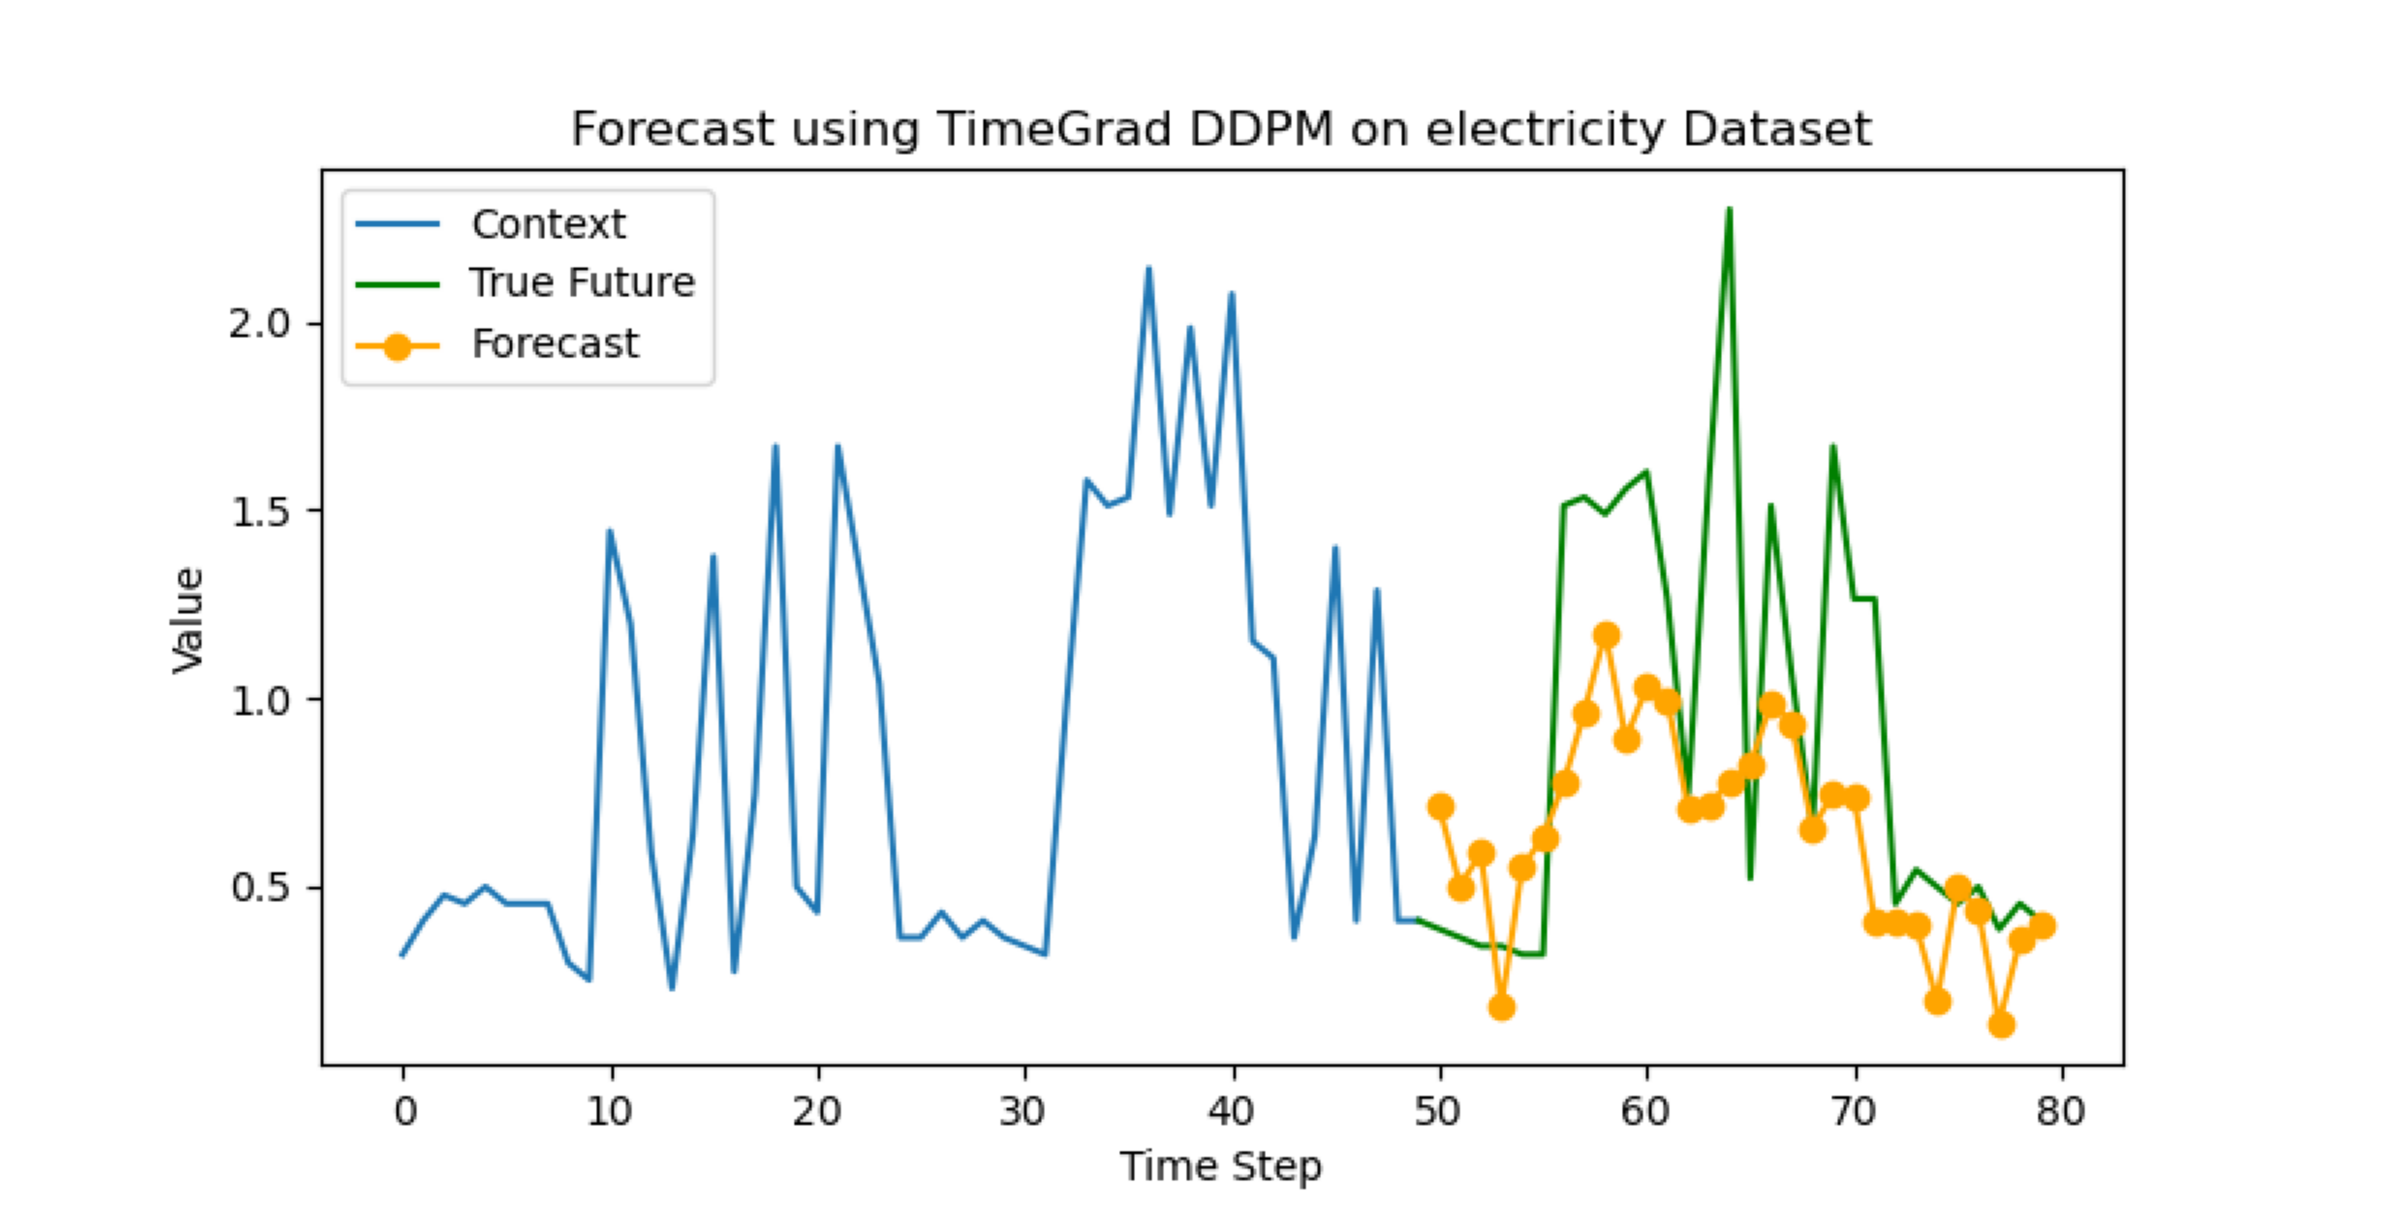

In [32]:
img = Image.open('resultsparam/lr_0.0001_forecast_plot.png')
plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(np.array(img))
plt.axis('off')
plt.show()

### Manual hyperparameter tuning


Due to the inherent randomness introduced by the diffusion process and other stochastic operations, our grid search did not yield fully reproducible MSE and MAE values. To address this, we manually selected a set of hyperparameters that consistently produced good results. We began with the hyperparameters reported in [1] and then tweaked them for our specific architecture. This fixed set is used for the comparative evaluation of the different models below.


In [16]:
!python TS.py --lr 0.0001 --num_steps 50 --context_length 100 --forecast_steps 30 --num_epochs 1000 --hidden_dim 32 --dataset electricity --n_data 900 --save_plot --outdir ./results

/users/eleves-b/2022/imane.mokhtatif/.local/lib/python3.9/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
Training with lr=0.0001, num_steps=50, context_length=100, num_epochs=1000, hidden_dim=32 on dataset: electricity
Epoch 100/1000, Loss=0.2783
Epoch 200/1000, Loss=0.3235
Epoch 300/1000, Loss=0.2672
Epoch 400/1000, Loss=0.3081
Epoch 500/1000, Loss=0.2673
Epoch 600/1000, Loss=0.2905
Epoch 700/1000, Loss=0.2193
Epoch 800/1000, Loss=0.2248
Epoch 900/1000, Loss=0.2391
Epoch 1000/1000, Loss=0.2049
Forecast MSE: 0.3428
Forecast MAE: 0.4640
Plot saved to ./results/forecast_plot_optim.png


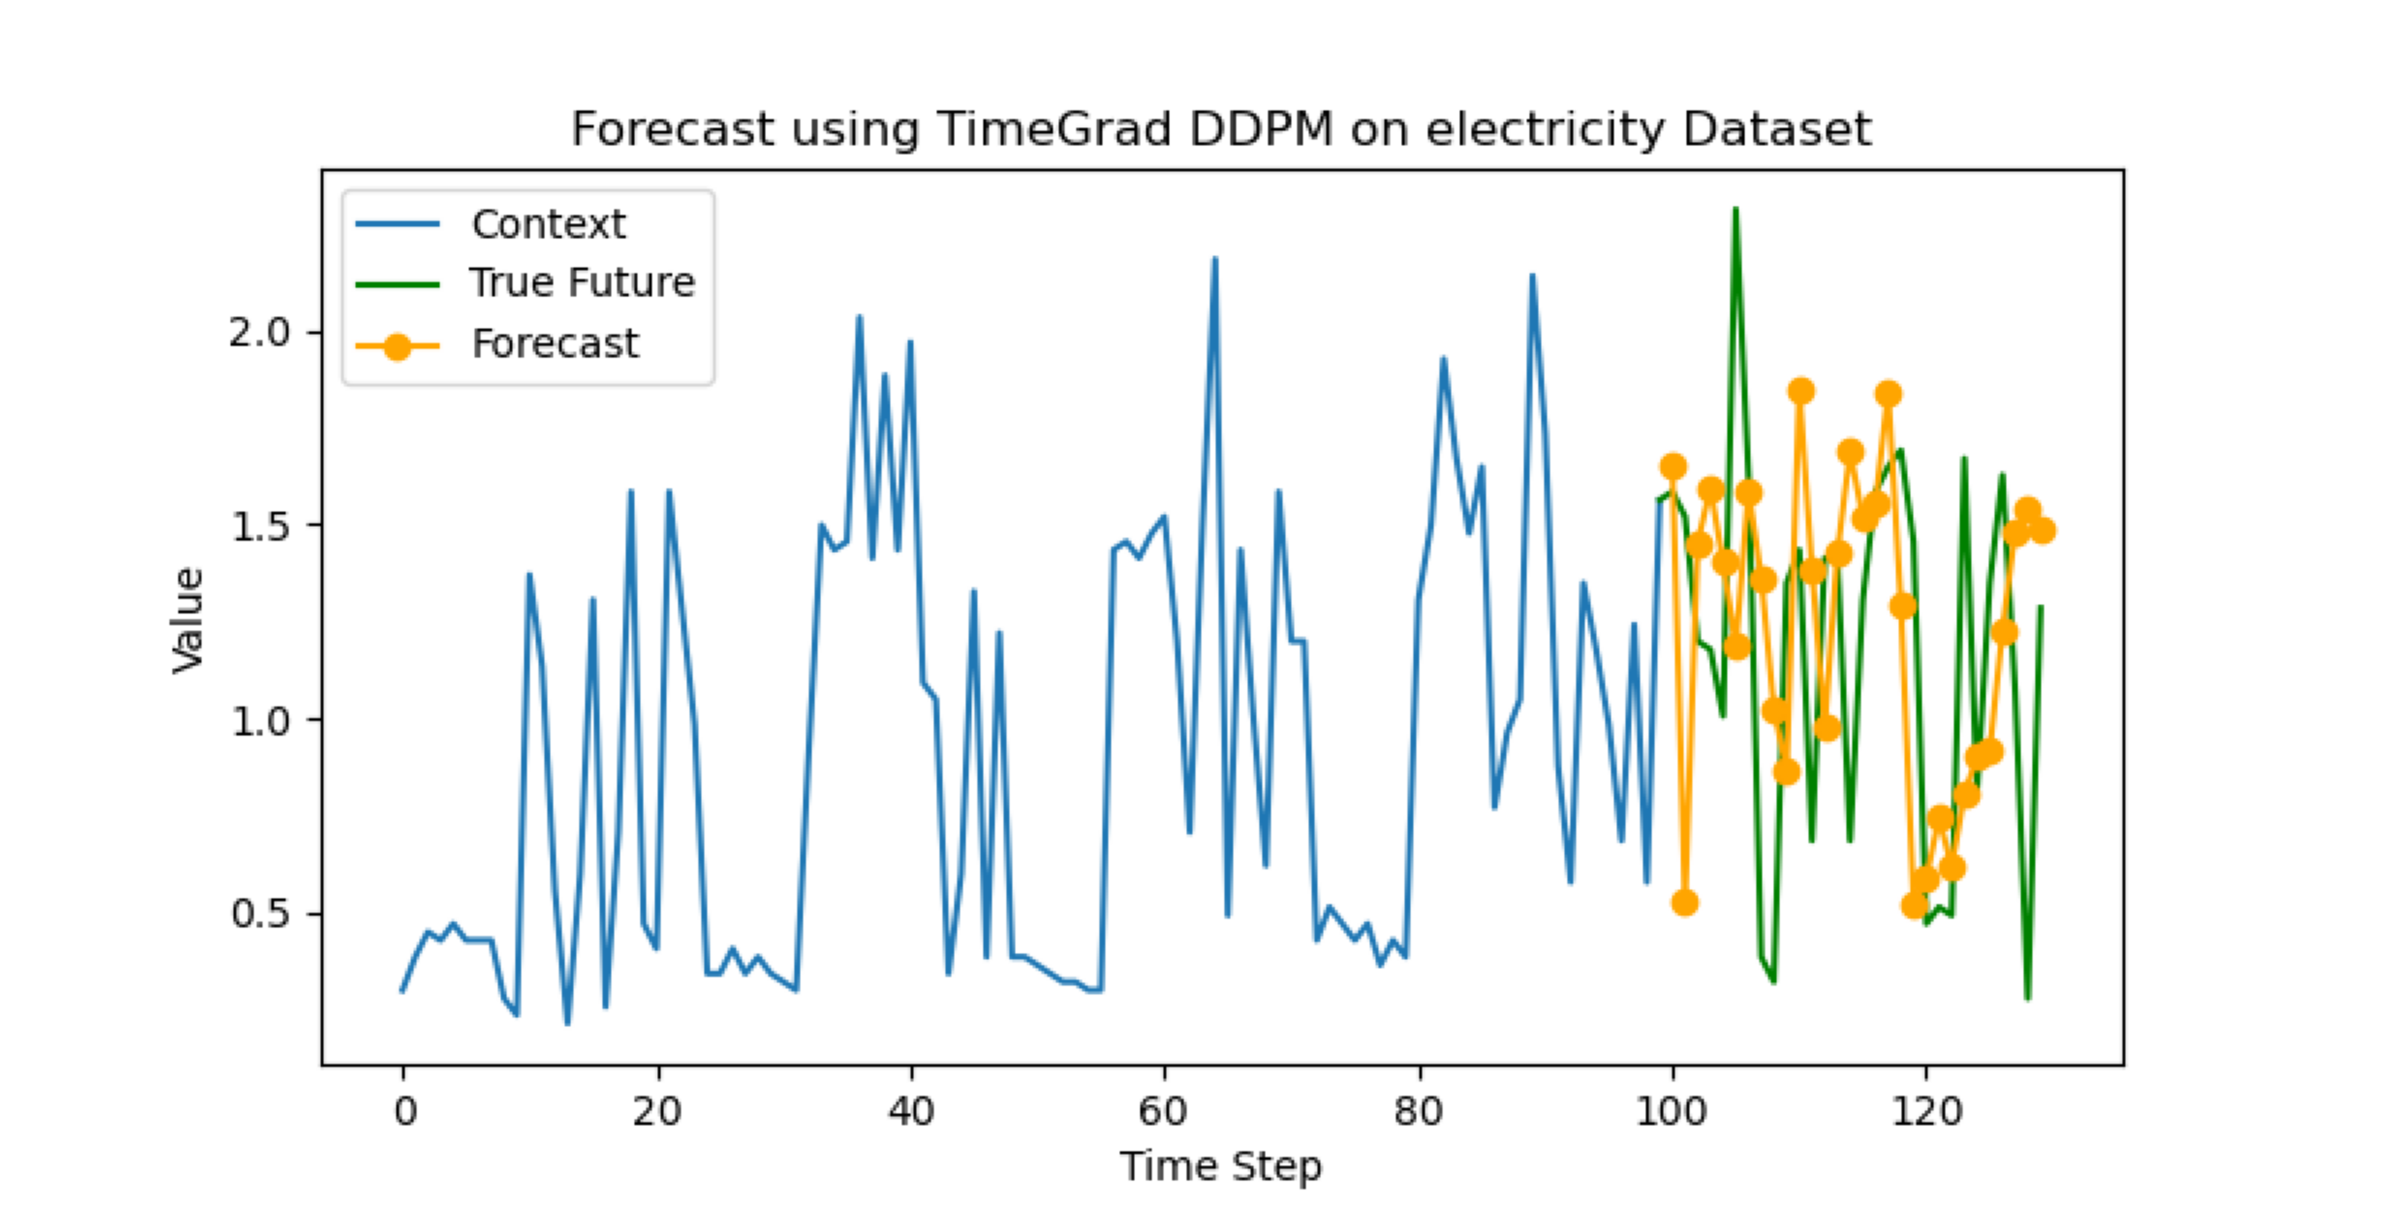

In [28]:
img = Image.open('results/forecast_plot_optim.png')
plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(np.array(img))
plt.axis('off')
plt.show()

### Comparing models

/tmp/ipykernel_677235/2066454226.py:40: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(pred, y)


AR Epoch 100, Loss: 0.1462
AR Epoch 200, Loss: 0.1437
AR Epoch 300, Loss: 0.1434
AR Epoch 400, Loss: 0.1433
AR Epoch 500, Loss: 0.1433
AR Epoch 600, Loss: 0.1433
AR Epoch 700, Loss: 0.1433
AR Epoch 800, Loss: 0.1433
AR Epoch 900, Loss: 0.1433
AR Epoch 1000, Loss: 0.1433


/tmp/ipykernel_677235/2066454226.py:90: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(pred, y)


RNN Epoch 100, Loss: 0.1596
RNN Epoch 200, Loss: 0.1387
RNN Epoch 300, Loss: 0.1260
RNN Epoch 400, Loss: 0.1154
RNN Epoch 500, Loss: 0.1146
RNN Epoch 600, Loss: 0.0943
RNN Epoch 700, Loss: 0.0858
RNN Epoch 800, Loss: 0.0811
RNN Epoch 900, Loss: 0.1268
RNN Epoch 1000, Loss: 0.0887


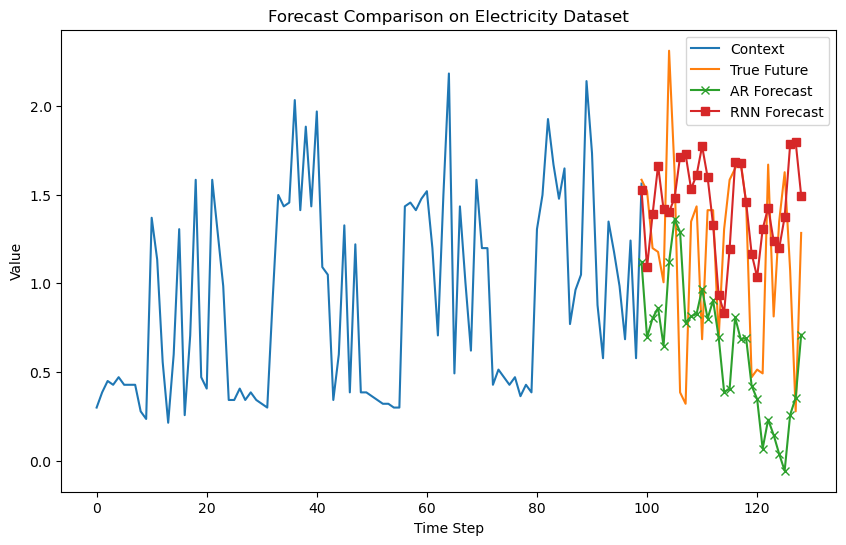

In [ ]:
# Load Dataset                      
ds = datasets.get_dataset("electricity", n=900)
data_tensor = ds[:][0]
data_array = data_tensor.squeeze(-1).numpy()

# Use first 100 points as context and the next 30 as true future
context_length = 100
forecast_steps = 30
context_series = data_array[:context_length]
true_future = data_array[context_length:context_length + forecast_steps]


# 1. Simple Autoregressive Model    

class ARModel(nn.Module):
    def __init__(self, seq_len):
        super(ARModel, self).__init__()
        self.linear = nn.Linear(seq_len, 1)
    
    def forward(self, x):
        # x shape: (batch, seq_len, 1) -> (batch, seq_len)
        x = x.squeeze(-1)
        return self.linear(x)

def train_ar_model(model, data, seq_len, num_epochs=5, lr=1e-4, device='cpu'):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    data_tensor = torch.tensor(data, dtype=torch.float32).unsqueeze(-1).to(device)
    T = data_tensor.size(0)
    for epoch in range(num_epochs):
        total_loss = 0
        count = 0
        for start in range(T - seq_len):
            x = data_tensor[start:start+seq_len].unsqueeze(0)  # (1, seq_len, 1)
            y = data_tensor[start+seq_len]  # (1, 1)
            pred = model(x)
            loss = F.mse_loss(pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            count += 1
        if (epoch+1) % 100 == 0:
            print(f"AR Epoch {epoch+1}, Loss: {total_loss/count:.4f}")

def forecast_ar_model(model, context, forecast_steps, seq_len, device='cpu'):
    model.eval()
    context_tensor = torch.tensor(context, dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
    forecast = []
    input_seq = context_tensor[:, -seq_len:, :]  # use the last seq_len values
    with torch.no_grad():
        for _ in range(forecast_steps):
            pred = model(input_seq)  # (1, 1)
            forecast.append(pred.item())
            # Append prediction and slide the window forward
            input_seq = torch.cat([input_seq[:, 1:, :], pred.view(1,1,1)], dim=1)
    return forecast


# 2. Simple RNN Forecast Model      

class RNNForecast(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=1):
        super(RNNForecast, self).__init__()
        self.rnn = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x, h=None):
        # x: (batch, seq_len, input_dim)
        out, h = self.rnn(x, h)
        # Use the last output to forecast next value
        out = self.fc(out[:, -1, :])
        return out, h

def train_rnn_model(model, data, seq_len, num_epochs=5, lr=1e-4, device='cpu'):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    data_tensor = torch.tensor(data, dtype=torch.float32).unsqueeze(-1).to(device)
    T = data_tensor.size(0)
    for epoch in range(num_epochs):
        total_loss = 0
        count = 0
        for start in range(T - seq_len):
            x = data_tensor[start:start+seq_len].unsqueeze(0)
            y = data_tensor[start+seq_len]
            pred, _ = model(x)
            loss = F.mse_loss(pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            count += 1
        if (epoch+1) % 100 == 0:
            print(f"RNN Epoch {epoch+1}, Loss: {total_loss/count:.4f}")

def forecast_rnn_model(model, context, forecast_steps, seq_len, device='cpu'):
    model.eval()
    context_tensor = torch.tensor(context, dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
    forecast = []
    input_seq = context_tensor[:, -seq_len:, :]
    h = None
    with torch.no_grad():
        for _ in range(forecast_steps):
            pred, h = model(input_seq, h)
            forecast.append(pred.item())
            input_seq = torch.cat([input_seq[:, 1:, :], pred.view(1,1,1)], dim=1)
    return forecast

# 3. Timerad implementation (cf. TS.py)

# We assume the plot and forecast array are saved for the parameters we chose above

# Main Execution                    

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_steps = 50 
seq_len = context_length

# Train and forecast with AR model
ar_model = ARModel(seq_len).to(device)
train_ar_model(ar_model, data_array, seq_len, num_epochs=1000, lr=1e-4, device=device)
ar_forecast = forecast_ar_model(ar_model, context_series, forecast_steps, seq_len, device=device)

# Train and forecast with RNN model
rnn_model = RNNForecast(input_dim=1, hidden_dim=32, num_layers=1).to(device)
train_rnn_model(rnn_model, data_array, seq_len, num_epochs=1000, lr=1e-4, device=device)
rnn_forecast = forecast_rnn_model(rnn_model, context_series, forecast_steps, seq_len, device=device)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(context_length), context_series, label="Context")
plt.plot(np.arange(context_length-1, context_length+forecast_steps-1), true_future, label="True Future")
plt.plot(np.arange(context_length-1, context_length+forecast_steps-1), ar_forecast, label="AR Forecast", marker='x')
plt.plot(np.arange(context_length-1, context_length+forecast_steps-1), rnn_forecast, label="RNN Forecast", marker='s')
#plt.plot(np.arange(context_length-1, context_length+forecast_steps-1), diffusion_forecast, label="Diffusion Forecast", marker='d')
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Forecast Comparison on Electricity Dataset")
plt.legend()
plt.show()


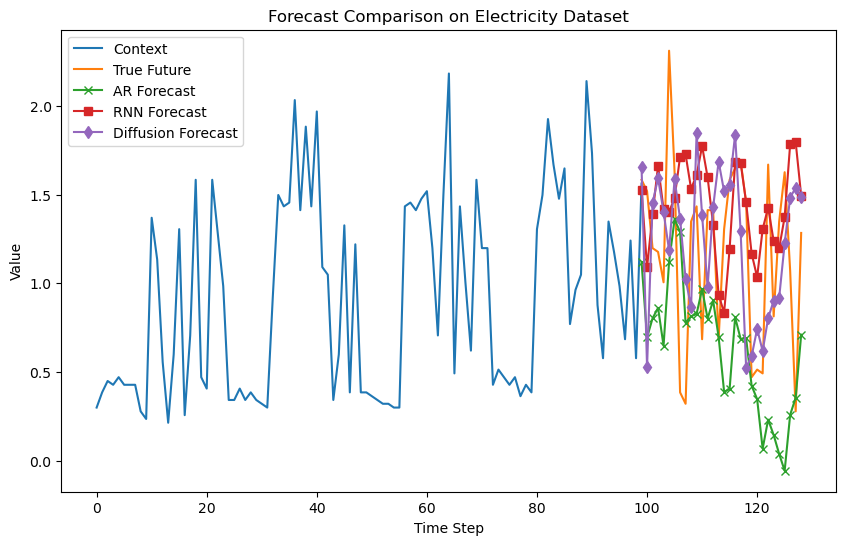

In [ ]:

# TimeGrad model
diffusion_forecast = np.load('results/forecast_optim.npy')

plt.figure(figsize=(10, 6))
plt.plot(np.arange(context_length), context_series, label="Context")
plt.plot(np.arange(context_length-1, context_length+forecast_steps-1), true_future, label="True Future")
plt.plot(np.arange(context_length-1, context_length+forecast_steps-1), ar_forecast, label="AR Forecast", marker='x')
plt.plot(np.arange(context_length-1, context_length+forecast_steps-1), rnn_forecast, label="RNN Forecast", marker='s')
plt.plot(np.arange(context_length-1, context_length+forecast_steps-1), diffusion_forecast, label="Diffusion Forecast", marker='d')
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Forecast Comparison on Electricity Dataset")
plt.legend()
plt.show()

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE for AR model
ar_mse = mean_squared_error(true_future, ar_forecast)
ar_mae = mean_absolute_error(true_future, ar_forecast)

# Calculate MSE and MAE for RNN model
rnn_mse = mean_squared_error(true_future, rnn_forecast)
rnn_mae = mean_absolute_error(true_future, rnn_forecast)

# Calculate MSE and MAE for Diffusion model
diffusion_mse = mean_squared_error(true_future, diffusion_forecast)
diffusion_mae = mean_absolute_error(true_future, diffusion_forecast)

# Print the results
print("AR Forecast - MSE: {:.4f}, MAE: {:.4f}".format(ar_mse, ar_mae))
print("RNN Forecast - MSE: {:.4f}, MAE: {:.4f}".format(rnn_mse, rnn_mae))
print("Diffusion Forecast - MSE: {:.4f}, MAE: {:.4f}".format(diffusion_mse, diffusion_mae))


AR Forecast - MSE: 0.5984, MAE: 0.6545
RNN Forecast - MSE: 0.3850, MAE: 0.4594
Diffusion Forecast - MSE: 0.3428, MAE: 0.4640


##### References

[1] *Autoregressive Denoising Diffusion Models for Multivariate Probabilistic Time Series Forecasting* ,Kashif Rasul, Calvin Seward, Ingmar Schuster, Roland Vollgraf, arXiv:2101.12072